In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetsime

In [ ]:
df_raw = dict()
df_results = dict()

for event in ['text_96', 'text_24']:
    df_raw[event] = pd.read_csv(f"../Data/Processed/{event}.csv")
    df_result = pd.read_csv(f"../Output/LLM_{event}.csv")
    df_result = df_result.merge(df_raw[event][["id", 'date']], on="id")
    df_result = df_result.drop(columns=['Topic', 'Word_Count', 'Taiwan_Count', 'US_count']).set_index('id')

    df_result['week'] = pd.to_datetime(df_result['date']).dt.to_period('W').apply(lambda r: r.end_time.date())

    df_result = df_result.drop(columns=['date'])
    df_result = df_result.groupby('week').sum()
    df_result = df_result.apply(lambda x: x.rolling(window=4).mean())
    df_result = df_result.dropna()
    if event == 'text_96':
        df_results["96_crisis"] = df_result
    if event == 'text_24':
        df_results["pelosi"] = df_result

In [ ]:

def add_vlines_96_crisis(plot_on=plt):
    # plot_on = plt for single plot
    # plot_on = ax for subplots
    
    plot_on.axvline(pd.to_datetime("1995-01-30"), color='purple', linestyle='--')
    plot_on.text(pd.to_datetime("1994-11-01"), plt.ylim()[1]*1.25, "Jiang's speech on reunification with Taiwan", color='purple', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1995-05-22"), color='green', linestyle='--')
    plot_on.text(pd.to_datetime("1994-12-01"), plt.ylim()[1]*1.12, 'US granted Lee a visa to visit US', color='green', verticalalignment='bottom')

    plot_on.axvline(pd.to_datetime("1995-06-09"), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("1995-02-01"), plt.ylim()[1]*1.01, "Lee's speech at Cornell University", color='r', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1995-07-07"), color='purple', linestyle='--')
    plot_on.text(pd.to_datetime("1995-07-01"), plt.ylim()[1]*1.37, "China's military exercises", color='purple', verticalalignment='bottom')

    plot_on.axvline(pd.to_datetime("1995-12-11"), color='green', linestyle='--')
    plot_on.text(pd.to_datetime("1995-09-01"), plt.ylim()[1]*1.46, "US deployed warships", color='green', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1996-03-25"), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("1996-03-01"), plt.ylim()[1]*1.12, 'Lee was reelected president', color='r', verticalalignment='bottom')
    
    
def add_vlines_pelosi(plot_on=plt):
    # plot_on = plt for single plot
    # plot_on = ax for subplots
    
    plot_on.axvline(pd.to_datetime("2022-08-02"), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("2022-03-01"), plt.ylim()[1]*1.20, "Pelosi visited Taiwan \nChina's military exercises", color='r', verticalalignment='bottom')
     
    plot_on.axvline(pd.to_datetime("2023-04-05"), color='green', linestyle='--')
    plot_on.text(pd.to_datetime("2023-01-01"), plt.ylim()[1]*1.11, "Tsai/McCarthy meeting \nChina's military exercises", color='green', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("2023-08-12"), color='purple', linestyle='--')
    plot_on.text(pd.to_datetime("2023-07-01"), plt.ylim()[1]*1.01, 'Lai visited US', color='purple', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("2024-11-30"), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("2024-09-01"), plt.ylim()[1]*1.20, "Lai visited US as Taiwan's president", color='r', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("2024-05-20"), color='green', linestyle='--')
    plot_on.text(pd.to_datetime("2024-03-01"), plt.ylim()[1]*1.12, "Inauguration of Lai as Taiwan's president", color='green', verticalalignment='bottom')
    
add_vlines = dict()
add_vlines['96_criss'] = add_vlines_96_crisis
add_vlines['pelosi'] = add_vlines_pelosi

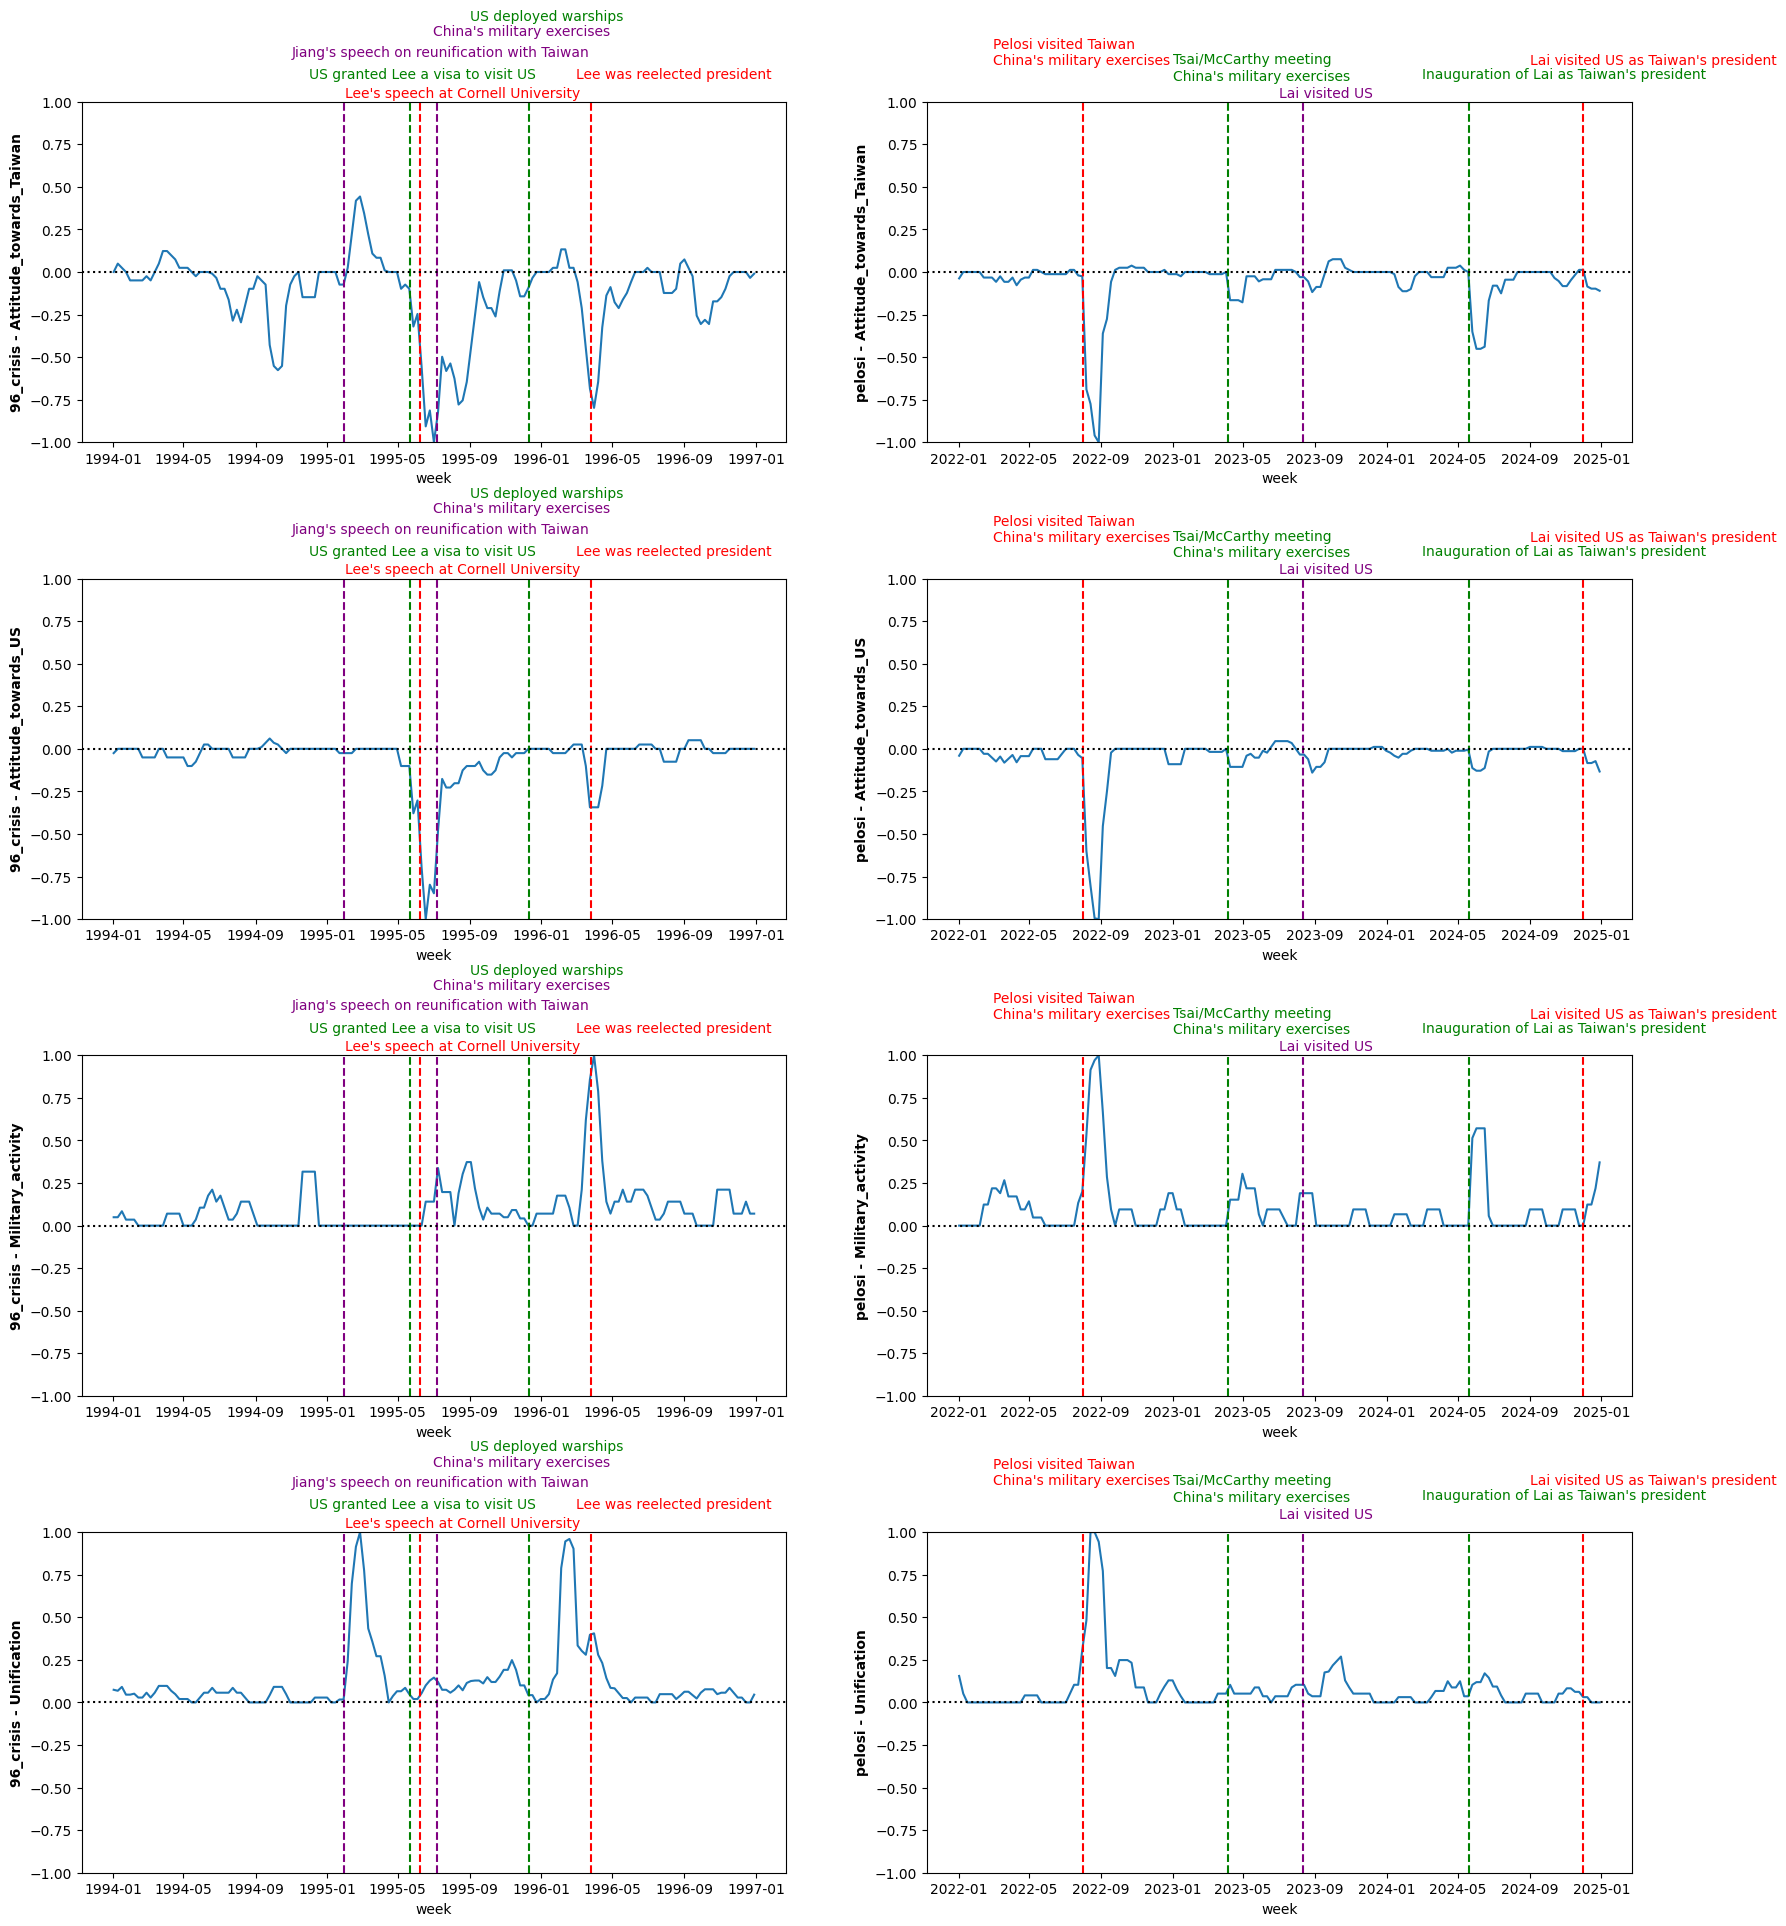

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 23))
axes = axes.flatten()

for i, topic in enumerate(["Attitude_towards_Taiwan", "Attitude_towards_US", "Military_activity", "Unification"]):
    for j, event in enumerate(['96_criss', 'pelosi']):
        ax = axes[i*2 + j]
        val = df_results[event][topic]
        val = val / max(abs(val))
        val.plot(ax=ax)
        add_vlines[event](ax)
        ax.axhline(y=0, color='black', linestyle=':')
        ax.set_ylim([-1, 1])
        ax.set_ylabel(f"{event} - {topic}", fontweight='bold')
        ax.title.set_position([.5, 5])
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()